In [17]:
!pip3 uninstall -y opencv-contrib-python 
!pip3 uninstall -y opencv-python

!pip3 install opencv-contrib-python
!pip3 install opencv-python

Found existing installation: opencv-contrib-python 4.5.5.64
Uninstalling opencv-contrib-python-4.5.5.64:
  Successfully uninstalled opencv-contrib-python-4.5.5.64
Found existing installation: opencv-python 4.5.5.64
Uninstalling opencv-python-4.5.5.64:
  Successfully uninstalled opencv-python-4.5.5.64
  Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (66.7 MB)


  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Computer Vision - Lab 2 

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

In [19]:
def matching(img, img_part, match_number=300):
  sift = cv.SIFT_create() 
  # find the keypoints and descriptors with SIFT 
  kp1, des1 = sift.detectAndCompute(img_part,None) 
  kp2, des2 = sift.detectAndCompute(img,None) 

  #Own Matcher 
  matchings = []
  for index1, desc1 in enumerate(des1):
    distances = []
    for index2, desc2 in enumerate(des2):
      dist_l2 = np.sqrt(np.sum(np.power((desc1-desc2),2)))
      distances.append(dist_l2)
    min_distance = min(distances)
    tr_ind = distances.index(min_distance)
    matchings.append(cv.DMatch(_distance=min_distance, _imgIdx=0, _queryIdx=index1,_trainIdx=tr_ind))
  matchings_sorted = sorted(matchings, key = lambda x:x.distance) 

  img_final =  cv.drawMatches(img_part,kp1,img,kp2,matchings_sorted[:match_number],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
  plt.figure(figsize=(10,10))
  plt.imshow(img_final)
  plt.show() 

In [20]:
def matching_opencv(img, img_part, match_number=300):
  sift = cv.SIFT_create() 
  # find the keypoints and descriptors with SIFT 
  kp1, des1 = sift.detectAndCompute(img_part,None) 
  kp2, des2 = sift.detectAndCompute(img,None) 
  # BFMatcher 
  bf = cv.BFMatcher() 
  matches = bf.match(des1,des2) 
  matches = sorted(matches, key = lambda x:x.distance) 

  img_final =  cv.drawMatches(img_part,kp1,img,kp2,matches[:match_number],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
  plt.figure(figsize=(10,10))
  plt.imshow(img_final)
  plt.show() 


## Experiment №1

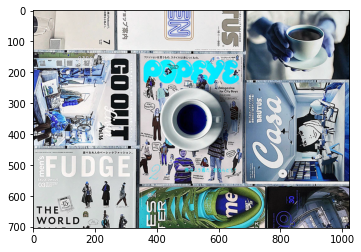

In [5]:
img1 = cv.imread('high_light.png')
plt.imshow(img1)
plt.show()

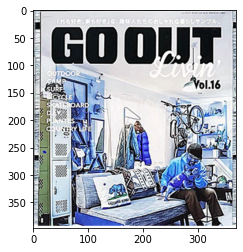

In [6]:
img1_part = cv.imread('high_light_part.png')
plt.imshow(img1_part)
plt.show()

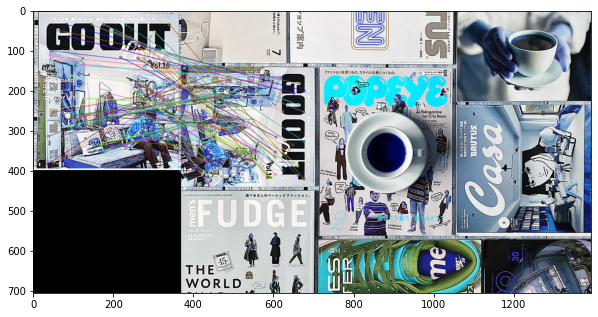

In [51]:
matching_opencv(img1, img1_part,100)

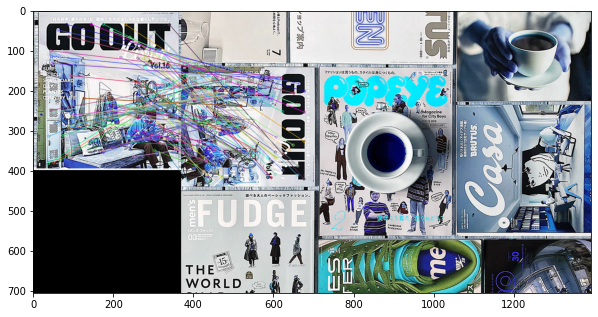

In [7]:
matching(img1, img1_part,100)

## Experimet №2

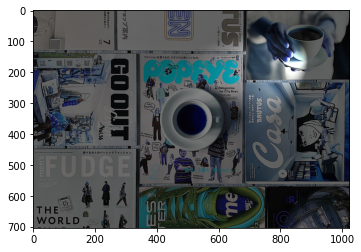

In [8]:
img2 = cv.imread('low_light.png')
plt.imshow(img2)
plt.show()

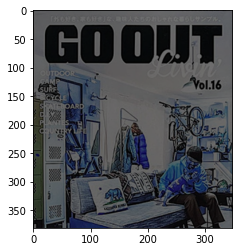

In [9]:
img2_part = cv.imread('low_light_part.png')
plt.imshow(img2_part)
plt.show()

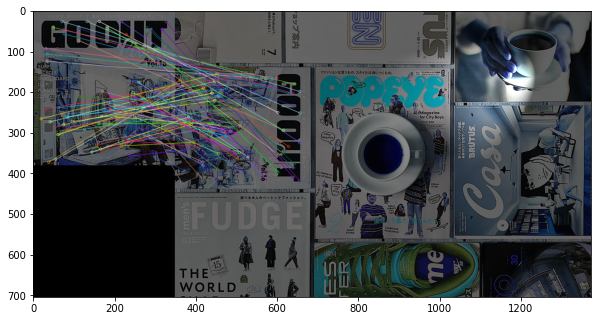

In [38]:
matching_opencv(img2, img2_part,100)

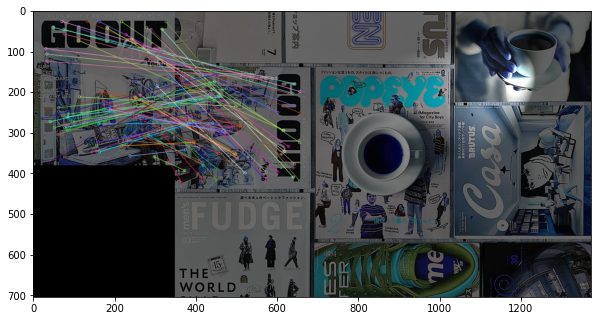

In [10]:
matching(img2, img2_part,100)

## Experiment № 3

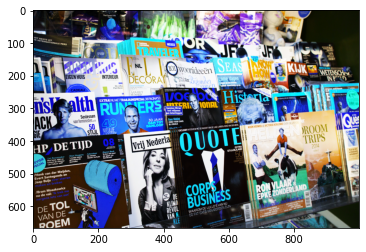

In [21]:
img3 = cv.imread('high_cont.png')
plt.imshow(img3)
plt.show()

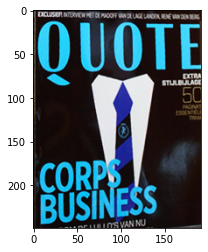

In [22]:
img3_part = cv.imread('high_cont_part_2.png')
plt.imshow(img3_part)
plt.show()

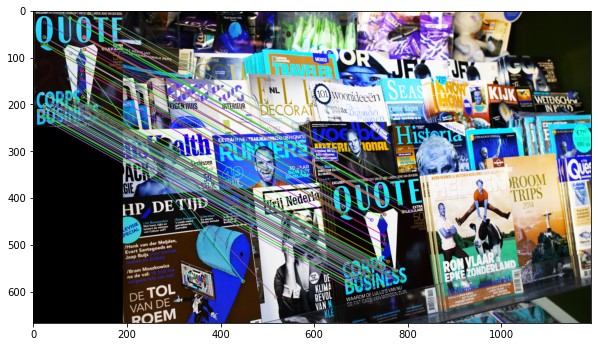

In [46]:
matching_opencv(img3, img3_part,100)

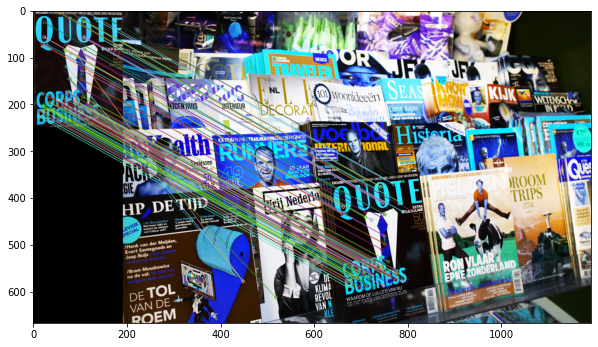

In [23]:
matching(img3, img3_part,100)

## Experiment №4

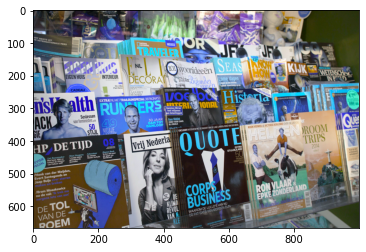

In [24]:
img4 = cv.imread('low_cont.png')
plt.imshow(img4)
plt.show()

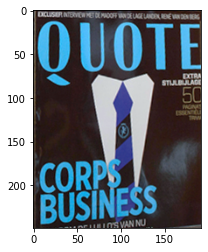

In [25]:
img4_part = cv.imread('low_cont_part_2.png')
plt.imshow(img4_part)
plt.show()

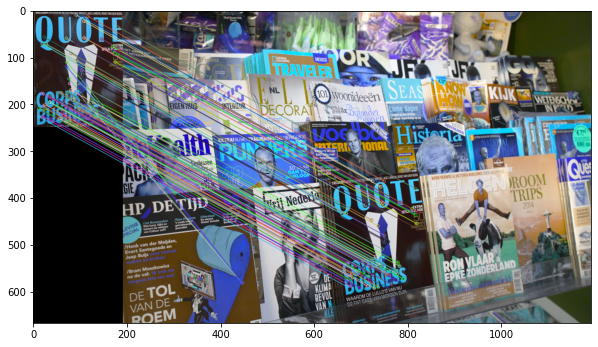

In [54]:
matching_opencv(img4, img4_part,100)

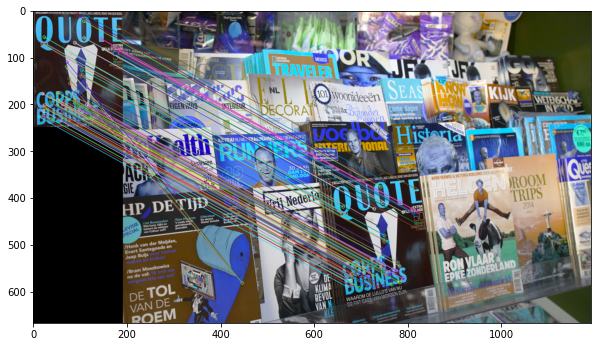

In [26]:
matching(img4, img4_part,100)